# Лабораторная работа 2. Методы поиска

### Вариант: **13**

## Задание 2. Поиск подстроки в строке. Метод золотого сечения. (Задача 11)

***Метод золотого сечения в отдельности от других методов не применим для задачи по поиску подстроки в строке***

***=> Рассмотрим метод золотого сечения для поиска экстремума функции***

### Теоретическое описание алгоритма
Метод золотого сечения является алгоритмом оптимизации для поиска экстремума функции на заданном интервале.

*Суть метода золотого сечения заключается в том, что он использует соотношение золотого сечения для выбора точек разбиения интервала поиска. Это соотношение имеет математически обоснованную оптимальность, которая позволяет методу быстро сокращать интервалы, в которых ищется экстремум функции.*

##### Алгоритм метода:

1. Задать точность поиска, например, $ε = 0.0001$.

2. Задать начальный интервал поиска $[a, b]$.

3. Вычислить длину интервала поиска $L = b - a$.

4. Вычислить две точки разбиения интервала $x_1$ и $x_2$ с помощью соотношения золотого сечения:

    $x_1 = b - \dfrac{L}{1.618}$
    
    $x_2 = a + \dfrac{L}{1.618}$

    Здесь $1.618$ – коэффициент золотого сечения.
5. Вычислить значения функции в точках $x_1$ и $x_2$, $f_1 = f(x_1)$ и $f_2 = f(x_2)$.

      - Если $|x2 - x1| < ε$ , перейти к шагу 6.

      - Если $f_1 < f_2$ , заменить интервал поиска на $[a, x_2]$ и перейти к шагу 3.

      - Если $f_1 >= f_2$ , заменить интервал поиска на $[x_1, b]$ и перейти к шагу 3.

6. Возвращаем результат: $\dfrac{(a+b)}{2}$.

##### Псевдокод алгоритма:
```
ЭПСИЛОН = 0.001;  # заданная точность
F(X) = ...;  # заданная функция
A, B = ..., ...;  # начало и конец интервала поиска
Ф = (1 + sqrt(5)) / 2;  # коэффициент золотого сечения

ВЫЧИСЛИТЬ L = B - A
ВЫЧИСЛИТЬ X1 = B - L / Ф
ВЫЧИСЛИТЬ X2 = A + L / Ф

ПОКА ДЛИНА ИНТЕРВАЛА [X1, X2] БОЛЬШЕ ЧЕМ ЭПСИЛОН:
    ЕСЛИ F(X1) МЕНЬШЕ ЧЕМ F(X2), ТО:
        ОБНОВИТЬ B = X2
        ОБНОВИТЬ X2 = X1
        ОБНОВИТЬ X1 = B - (B - A) / Ф
    ИНАЧЕ:
        ОБНОВИТЬ A = X1
        ОБНОВИТЬ X1 = X2
        ОБНОВИТЬ X2 = A + (B - A) / Ф

ВЫДАТЬ РЕЗУЛЬТАТ: (A + B) / 2
```

##### Достоинства:

 - Не требует вычисления производных функции: может использоваться для поиска экстремумов функций, для которых не известны производные или они трудно вычисляемы.

##### Недостатки:

 - Эффективность метода золотого сечения зависит от конкретной функции и интервала, на котором он применяется.
 
 - Если экстремум функции находится на одном из концов интервала, то метод золотого сечения не сможет его обнаружить.

 - Метод неэффективен в случае, когда интервал поиска слишком большой.

### Реализация алгоритма

In [145]:
def golden_section(f, a, b, eps=0.0001, mode='min'):
    """
    Метод золотого сечения для поиска экстремума функции f(x) на интервале [a, b] с заданной точностью eps.
    
    :param f: Функция, экстремум которой требуется найти
    :param a: Начало интервала
    :param b: Конец интервала
    :param eps: Заданная точность
    :param mode: Режим ('min' или 'max') поиска экстремума
    
    :return: Значение x, при котором достигается экстремум функции f(x) на интервале [a, b].
    """
    if mode == 'min':
        func = lambda x: f(x)
    elif mode == 'max':
        func = lambda x: -f(x)
    else:
        raise ValueError("Некорректный режим (mode). Выберите 'min' или 'max'.")
    
    golden_ratio = (1 + 5 ** 0.5) / 2  # Коэффициент золотого сечения
    L = b - a  # Размер текущего интвервала поиска
    x1 = b - (b - a) / golden_ratio  # Первая точка разбиения
    x2 = a + (b - a) / golden_ratio  # Вторая точка разбиения
    f1 = func(x1)  # Значение функции в первой точке разбиения
    f2 = func(x2)  # Значение функции во второй точке разбиения
    
    # Пока расстояние между точками разбиения не меньше точности eps
    while abs(x2 - x1) >= eps:
        # Если во второй точке разбиения функция больше
        if f1 < f2:
            # Меняем интервал поиска, откидывая самую правую часть
            b = x2
            x2 = x1
            x1 = b - (b - a) / golden_ratio
            f2 = f1
            f1 = f(x1)
        else:
            # Меняем интервал поиска, откидывая самую левую часть
            a = x1
            x1 = x2
            x2 = a + (b - a) / golden_ratio
            f1 = f2
            f2 = f(x2)
            
    return (a + b) / 2


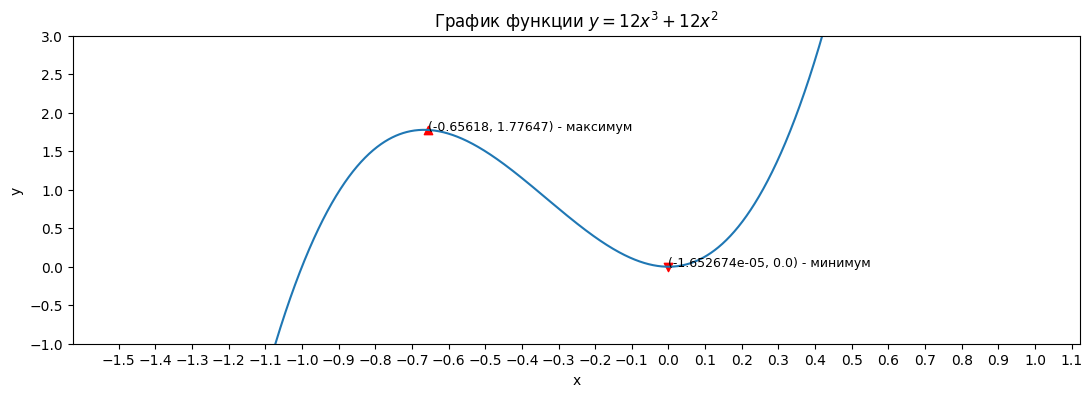

Точка минимума в интервале [-0.5, 1] (ε=0.0001): x=-1.652674033793898e-05
Точка максимума в интервале [-2, -0.1] (ε=0.0001): x=-0.6561824563852432


In [153]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 12 * x**3 + 12 * x**2

x_min = golden_section(f, -0.5, 1, 0.0001, mode='min')
x_max = golden_section(f, -1, -0.1, 0.0001, mode='max')

x = np.arange(-1.5, 1, 0.001)
y = f(x)
fig = plt.figure(figsize=(13, 4))
plt.plot(x, y)
plt.ylim(-1, 3)
plt.xticks(np.arange(-1.5, 1.2, 0.1))
plt.scatter(x_min, f(x_min), color='red', marker='v')
plt.text(x_min, f(x_min), f'({round(x_min, 11)}, {round(f(x_min), 5)}) - минимум', fontsize=9)
plt.scatter(x_max, f(x_max), color='red', marker='^')
plt.text(x_max, f(x_max), f'({round(x_max, 5)}, {round(f(x_max), 5)}) - максимум', fontsize=9)
plt.title("График функции $y=12x^3 + 12x^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Точка минимума в интервале [-0.5, 1] (ε=0.0001): x={point_min}")
print(f"Точка максимума в интервале [-2, -0.1] (ε=0.0001): x={point_max}")

### Блок-схема алгоритма поиска экстремума функции методом золотого сечения

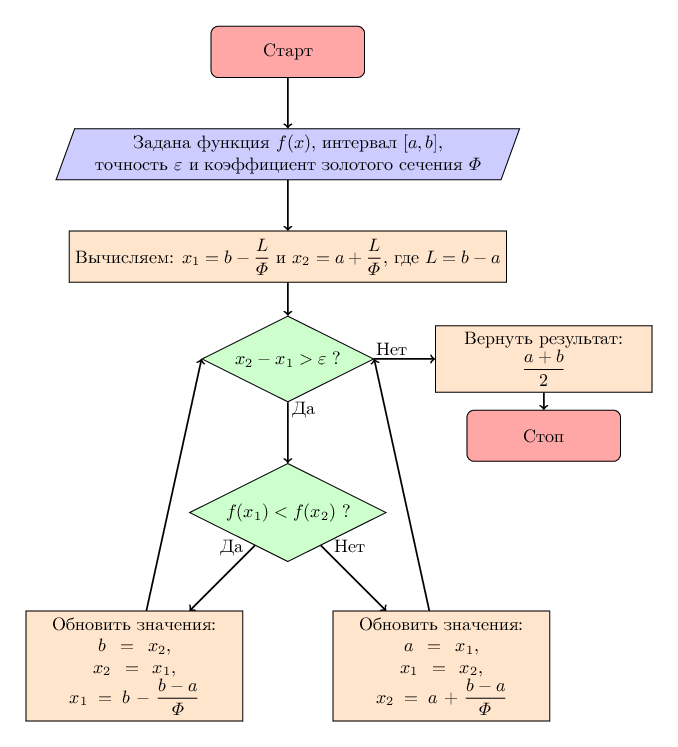

In [149]:
from wand.image import Image as WImage
blockscheme = WImage(filename='img/golden_blockscheme.pdf', 
                     resolution=130)
blockscheme